# Supplemental Data

In this notebook you will:

* Run some simulated experiments including supplemental baseline readings and an asynchronously monitored signal.
* Access the saved data.

## Configuration
Below, we will connect to EPICS IOC(s) controlling simulated hardware in lieu of actual motors, detectors. The IOCs should already be running in the background. Run this command to verify that they are running: it should produce output with RUNNING on each line. In the event of a problem, edit this command to replace `status` with `restart all` and run again.

In [1]:
!supervisorctl -c supervisor/supervisord.conf status

decay                            RUNNING   pid 4873, uptime 0:05:56
mini_beamline                    RUNNING   pid 4874, uptime 0:05:56
random_walk                      RUNNING   pid 4875, uptime 0:05:56
random_walk_horiz                RUNNING   pid 4876, uptime 0:05:56
random_walk_vert                 RUNNING   pid 4877, uptime 0:05:56
simple                           RUNNING   pid 4878, uptime 0:05:56
thermo_sim                       RUNNING   pid 4879, uptime 0:05:56
trigger_with_pc                  RUNNING   pid 4880, uptime 0:05:56


In [2]:
%run scripts/beamline_configuration.py

In [3]:
sd

SupplementalData(baseline=[], monitors=[], flyers=[])

### Baseline Readings

Now, at the beginning and end of every run, record the positions of these motors.

In [4]:
sd.baseline = [mtr_spotx, mtr_spoty]

In [5]:
# run a similar scan as other exercises
plt.figure('ph_det vs motor_ph')
RE(scan([ph], motor_ph, -1, 1, 5))

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …



Transient Scan ID: 28     Time: 2020-05-20 15:29:28
Persistent Unique Scan ID: '9a4073b6-9eca-4425-a949-248491cd4cc6'
New stream: 'baseline'
Start-of-run baseline readings:
+--------------------------------+--------------------------------+
|                    motor_spotx | 1.0                            |
|                    motor_spoty | 0.0                            |
+--------------------------------+--------------------------------+
New stream: 'primary'


+-----------+------------+------------+------------+
|   seq_num |       time |   motor_ph |     ph_det |
+-----------+------------+------------+------------+
|         1 | 15:29:28.6 |     -1.000 |      93280 |
|         2 | 15:29:28.6 |     -0.500 |      94874 |
|         3 | 15:29:28.6 |      0.000 |      95242 |
|         4 | 15:29:28.6 |      0.500 |      94333 |
|         5 | 15:29:28.7 |      1.000 |      92759 |
+-----------+------------+------------+------------+
generator scan ['9a4073b6'] (scan num: 28)
End-of-run baseline readings:
+--------------------------------+--------------------------------+
|                    motor_spotx | 1.0                            |
|                    motor_spoty | 0.0                            |
+--------------------------------+--------------------------------+





('9a4073b6-9eca-4425-a949-248491cd4cc6',)

Notice

``New stream: 'baseline'``

as well as the boxes of readings. How can we access that data later? It doesn't show up in the table!

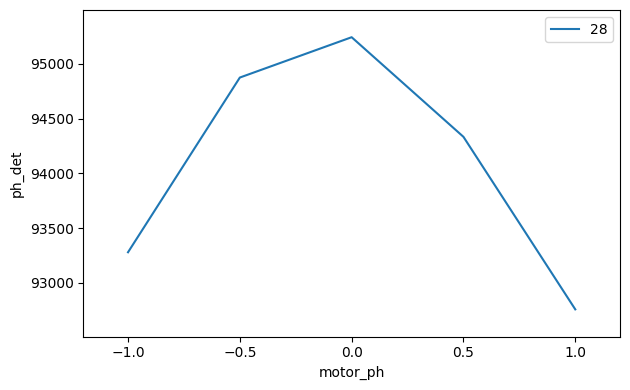

In [6]:
# Let's show the plot again so you can refer back to it when looking at the tables.
plt.gcf()

In [7]:
db[-1].table()

,time,motor_ph,ph_det
seq_num,,,
1,2020-05-20 15:29:28.635027170,-1.0,93280.0
2,2020-05-20 15:29:28.682381392,-0.5,94874.0
3,2020-05-20 15:29:28.690440655,0.0,95242.0
4,2020-05-20 15:29:28.697750330,0.5,94333.0
5,2020-05-20 15:29:28.704654932,1.0,92759.0


In [8]:
db[-1].table('primary')  # the default

,time,motor_ph,ph_det
seq_num,,,
1,2020-05-20 15:29:28.635027170,-1.0,93280.0
2,2020-05-20 15:29:28.682381392,-0.5,94874.0
3,2020-05-20 15:29:28.690440655,0.0,95242.0
4,2020-05-20 15:29:28.697750330,0.5,94333.0
5,2020-05-20 15:29:28.704654932,1.0,92759.0


In [9]:
db[-1].table('baseline')

,time,motor_spoty,motor_spotx
seq_num,,,
1,2020-05-20 15:29:28.433927536,0.0,1.0
2,2020-05-20 15:29:28.709964275,0.0,1.0


If the table gets too wide, it's handy to know how to take the transpose of a `DataFrame`.

In [10]:
db[-1].table('baseline').T

seq_num,1,2
time,2020-05-20 15:29:28.433927536,2020-05-20 15:29:28.709964275
motor_spoty,0,0
motor_spotx,1,1


### Asynchronous Monitoring

In [11]:
sd.monitors = [I]

In [12]:
RE(scan([ph], motor_ph, -1, 1, 10))



Transient Scan ID: 29     Time: 2020-05-20 15:29:29
Persistent Unique Scan ID: '1560e846-7b45-4713-9b1f-662870e676fd'
New stream: 'baseline'
Start-of-run baseline readings:
+--------------------------------+--------------------------------+
|                    motor_spotx | 1.0                            |
|                    motor_spoty | 0.0                            |
+--------------------------------+--------------------------------+
New stream: 'I_monitor'


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |   motor_ph |     ph_det |
+-----------+------------+------------+------------+
|         1 | 15:29:29.4 |     -1.000 |      95856 |


|         2 | 15:29:29.4 |     -0.778 |      97684 |
|         3 | 15:29:29.5 |     -0.556 |      98425 |


|         4 | 15:29:29.6 |     -0.333 |      99213 |
|         5 | 15:29:29.6 |     -0.111 |     100103 |
|         6 | 15:29:29.6 |      0.111 |      99009 |
|         7 | 15:29:29.6 |      0.333 |      99252 |
|         8 | 15:29:29.6 |      0.556 |      99301 |
|         9 | 15:29:29.6 |      0.778 |      98555 |
|        10 | 15:29:29.6 |      1.000 |      97137 |


+-----------+------------+------------+------------+
generator scan ['1560e846'] (scan num: 29)
End-of-run baseline readings:
+--------------------------------+--------------------------------+
|                    motor_spotx | 1.0                            |
|                    motor_spoty | 0.0                            |
+--------------------------------+--------------------------------+





('1560e846-7b45-4713-9b1f-662870e676fd',)

Notice

``New stream: 'I_monitor'``

and a new figure. But the Best-Effort Callback doesn't show us the numbers from monitor readings. (There's just not enough room.)

In [13]:
h = db[-1]
h.table('I_monitor')

,time,I
seq_num,,
1,2020-05-20 15:29:29.369683743,490.777096
2,2020-05-20 15:29:29.370408773,490.777096
3,2020-05-20 15:29:29.471359015,494.556581
4,2020-05-20 15:29:29.578106165,498.459631


What streams do we have? Another good `Header` method to know:

In [14]:
h.stream_names

['baseline', 'primary', 'I_monitor']

## Exercises

1. Add `mtr_slit` to the list of things to be recorded as baseline readings.

In [15]:
%load solutions/add_baseline_device.py

2. Remove `mtr_slit` from the list of things to be recorded as baseline readings.

In [16]:
%load solutions/remove_baseline_device.py

3. Empty the list of things to be monitored.

In [17]:
%load solutions/clear_supplemental_monitors.py